<a href="https://colab.research.google.com/github/SharmaineMangombe/Childline-Kenya-Call-Volume-Prediction-Challenge/blob/main/Childline_Kenya_Call_Volume_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import logging
%matplotlib inline

In [ ]:
# Declaring dataframes

data = pd.read_csv('train.csv', parse_dates=['calldate'])
SB=pd.read_csv('Sample_Submission.csv')

print(data.shape)

data.iloc[:5,:5]

(135988, 19)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,13,14,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,calldate,cc_status,maincat,subcat1,casepriority
0,2016-01-01 07:26:47,Closed,non-interventional,Blank call,Non Critical
1,2016-01-01 07:32:30,Closed,non-interventional,Blank call,Non Critical
2,2016-01-01 07:44:31,Closed,non-interventional,Blank call,Non Critical
3,2016-01-01 07:46:13,Closed,others,Unrelated to remit of Childline 116,Non Critical
4,2016-01-01 07:47:22,Closed,non-interventional,Blank call,Non Critical


In [ ]:
# creating number of calls column
data['calldate']=data['calldate'].dt.floor("H")
data['call']=np.ones(135988)
train = data.pivot_table(index=['calldate'], values='call', aggfunc='sum')

In [ ]:
train_series.describe()

count    3697.000000
mean       36.783338
std        27.824597
min         1.000000
25%        15.000000
50%        32.000000
75%        53.000000
max       197.000000
Name: call, dtype: float64

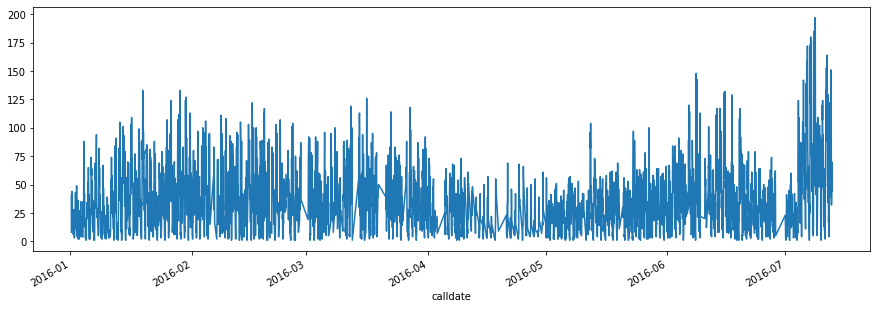

In [ ]:
# Plotting a time series graph

plt.figure(figsize=(15,5))
train_series.plot()


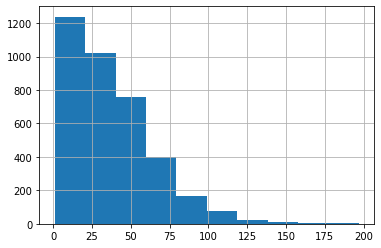

In [ ]:
train_series.hist()

In [ ]:
# level of stationarity

from statsmodels.tsa.stattools import adfuller
series=adfuller(train_series)
print(series[0])
print(series[1])

-5.297578010318953
5.539262970850805e-06


Text(0, 0.5, 'Number of calls')

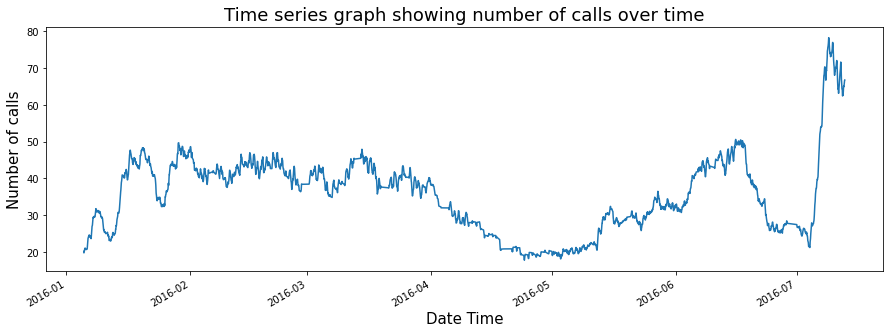

In [ ]:
# Plotting a time series graph with window=30

train_mean=train_series.rolling(window=90).mean()
plt.figure(figsize=(15,5))
train_mean.plot()
plt.title('Time series graph showing number of calls over time', fontsize=18)
plt.xlabel('Date Time', fontsize=15)
plt.ylabel('Number of calls', fontsize=15)

In [ ]:
train.set_index(['calldate'], inplace=True)

train['hour']=train.index.hour
train['day']=train.index.day
train['month']=train.index.month


In [ ]:
train.head(10)

,call,lag_1,lag_2,lag_3,mean_4,mean_5,mean_6,min_5,min_6,max_5,max_6,hour,day,month
calldate,,,,,,,,,,,,,,
2016-07-12 14:00:00,89.0,94.0,39.0,108.0,82.50,80.4,77.666667,39.0,39.0,108.0,108.0,14,12,7
2016-07-12 15:00:00,151.0,89.0,94.0,39.0,93.25,96.2,92.166667,39.0,39.0,151.0,151.0,15,12,7
2016-07-12 16:00:00,140.0,151.0,89.0,94.0,118.50,102.6,103.500000,39.0,39.0,151.0,151.0,16,12,7
2016-07-12 17:00:00,84.0,140.0,151.0,89.0,116.00,111.6,99.500000,84.0,39.0,151.0,151.0,17,12,7
2016-07-12 18:00:00,32.0,84.0,140.0,151.0,101.75,99.2,98.333333,32.0,32.0,151.0,151.0,18,12,7
2016-07-12 19:00:00,39.0,32.0,84.0,140.0,73.75,89.2,89.166667,32.0,32.0,151.0,151.0,19,12,7
2016-07-12 20:00:00,70.0,39.0,32.0,84.0,56.25,73.0,86.000000,32.0,32.0,140.0,151.0,20,12,7
2016-07-12 21:00:00,44.0,70.0,39.0,32.0,46.25,53.8,68.166667,32.0,32.0,84.0,140.0,21,12,7
2016-07-12 22:00:00,55.0,44.0,70.0,39.0,52.00,48.0,54.000000,32.0,32.0,70.0,84.0,22,12,7


In [ ]:

train.drop(['calldate'],axis=1, inplace=True)
train.dropna(inplace=True)
train.head(10)

,call,lag_1,lag_2,lag_3,mean_4,mean_5,mean_6,min_5,min_6,max_5,max_6,hour,day,month
5,27.0,44.0,34.0,20.0,31.25,33.2,29.000000,20.0,8.0,44.0,44.0,12,1,1
6,11.0,27.0,44.0,34.0,29.00,27.2,29.500000,11.0,11.0,44.0,44.0,13,1,1
7,20.0,11.0,27.0,44.0,25.50,27.2,26.000000,11.0,11.0,44.0,44.0,14,1,1
8,21.0,20.0,11.0,27.0,19.75,24.6,26.166667,11.0,11.0,44.0,44.0,15,1,1
9,18.0,21.0,20.0,11.0,17.50,19.4,23.500000,11.0,11.0,27.0,44.0,16,1,1
10,22.0,18.0,21.0,20.0,20.25,18.4,19.833333,11.0,11.0,22.0,27.0,17,1,1
11,18.0,22.0,18.0,21.0,19.75,19.8,18.333333,18.0,11.0,22.0,22.0,18,1,1
12,6.0,18.0,22.0,18.0,16.00,17.0,17.500000,6.0,6.0,22.0,22.0,19,1,1
13,14.0,6.0,18.0,22.0,15.00,15.6,16.500000,6.0,6.0,22.0,22.0,20,1,1
14,14.0,14.0,6.0,18.0,13.00,14.8,15.333333,6.0,6.0,22.0,22.0,21,1,1


In [ ]:
# Base model prediction error

base_model= base_model[1:]
base_model_error=mean_squared_error(base_model.actual_calls,base_model.forecast_calls)
print(np.sqrt(base_model_error))


24.24212171753878


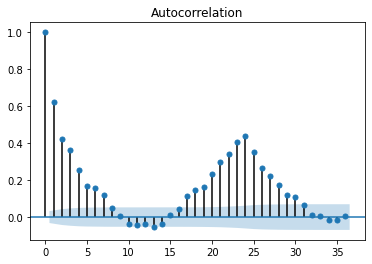

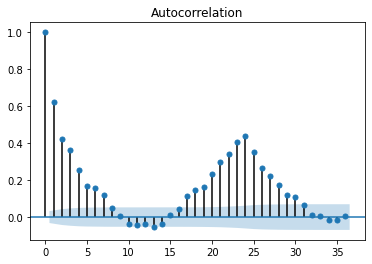

In [ ]:
# Extracting the best q value from the graph

plot_acf(train_series)

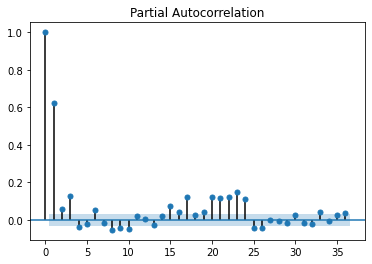

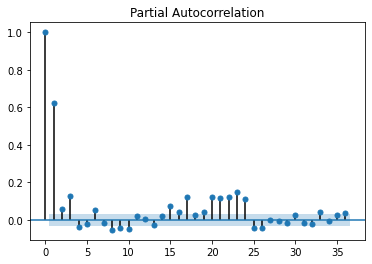

In [ ]:
# Extracting the best p value from the graph

plot_pacf(train_series)

In [ ]:
# Creating test and train sets

train_size= train_series[:2000]
test_size=train_series[2000:]
print(train_size.size)
print(test_size.size)

2000
1697


In [ ]:
# Applying and making prediction using the ARIMA model

from statsmodels.tsa.arima_model import ARIMA
ARIMA_model=ARIMA(train_size, order=(1,1,1))
ARIMA_model_fit= ARIMA_model.fit()
print(ARIMA_model_fit.aic)
prediction=ARIMA_model_fit.forecast(steps=1697)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: ignored

In [ ]:
ARIMA=mean_squared_error(test_size,prediction)
print(np.sqrt(ARIMA))

28.739808626427607


In [ ]:
prediction

array([17.57644166, 23.42153392, 26.65230514, ..., 34.60318843,
       34.60553127, 34.60787412])

In [ ]:
# Applying and making prediction using the ARIMA model

ARIMA_model=ARIMA(train_series, order=(1,1,1))
ARIMA_model_fit= ARIMA_model.fit()
print(ARIMA_model_fit.aic)
PA=ARIMA_model_fit.forecast(steps=1184)[0]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


33198.43049867137


In [ ]:
SB.shape

(1184, 2)

In [ ]:

submission=pd.DataFrame({'time_index':SB['time_index'], 'calls':PA })
submission.to_csv('Arima_submission.csv', index=False)

In [ ]:

from statsmodels.regression.linear_model import yule_walker

rho, sigma = yule_walker(train_series, 1, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [-0.62030054]
sigma: 21.821666503601087


In [ ]:
from statsmodels.tsa.ar_model import AR
model = AR(train_size)
model_fit = model.fit()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
predictions = model_fit.predict(start=len(train_size), end=len(train_size)+len(test_size)-1, dynamic=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
AR=mean_squared_error(test_size,predictions)
print(np.sqrt(AR))

29.215681902144812
